In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import yfinance as yf
import matplotlib.pyplot as plt

In [ ]:
# To clear GPU memory
tf.keras.backend.clear_session()

In [ ]:
from pandas_datareader import DataReader
from pandas_datareader import data as pdr

In [ ]:
from datetime import datetime

## Large Dataset

In [ ]:
start = "2007-01-01"
end = "2023-07-31"

# Convert start and end dates to datetime objects
start_date = datetime.strptime(start, "%Y-%m-%d")
end_date = datetime.strptime(end, "%Y-%m-%d")

# Set up the data reader with Yahoo Finance
yf.pdr_override()

In [ ]:
# Making an array for different stock prices from tech industry
# AAPL - Apple
# MSFT - Microsoft
# AMZN - Amazon
# NFLX - Netflix
# INFY - Infosys
# ADBE - Adobe
# GOOGL - Google (Class A - gives voting rights)
# NVDA - NVIDIA Corporation

stock_types = ["AAPL", "MSFT", "AMZN", "NFLX", "INFY", "ADBE", "GOOGL", "NVDA"]

In [ ]:
# Making dictionary for every stock
stock_dict = {}
for stock in stock_types:
  stock_dict[stock] = None

In [ ]:
for stock in stock_dict:
  print(stock)

AAPL
MSFT
AMZN
NFLX
INFY
ADBE
GOOGL
NVDA


In [ ]:
for stock in stock_dict:
  # Fetch the data using DataReader
  df = pdr.get_data_yahoo(stock, start=start_date, end=end_date)
  df = df.reset_index()

  if df is not None:
    stock_dict[stock] = df
    print(stock + "-" )
    print(df.head())  # Display the first few rows of the loaded data

[*********************100%%**********************]  1 of 1 completed
AAPL-
        Date      Open      High       Low     Close  Adj Close      Volume
0 2007-01-03  3.081786  3.092143  2.925000  2.992857   2.540327  1238319600
1 2007-01-04  3.001786  3.069643  2.993571  3.059286   2.596711   847260400
2 2007-01-05  3.063214  3.078571  3.014286  3.037500   2.578219   834741600
3 2007-01-08  3.070000  3.090357  3.045714  3.052500   2.590951   797106800
4 2007-01-09  3.087500  3.320714  3.041071  3.306071   2.806182  3349298400
[*********************100%%**********************]  1 of 1 completed
MSFT-
        Date       Open       High        Low      Close  Adj Close    Volume
0 2007-01-03  29.910000  30.250000  29.400000  29.860001  21.480505  76935100
1 2007-01-04  29.700001  29.969999  29.440001  29.809999  21.444532  45774500
2 2007-01-05  29.629999  29.750000  29.450001  29.639999  21.322245  44607200
3 2007-01-08  29.650000  30.100000  29.530001  29.930000  21.530857  50220200
4 20

In [ ]:
data_dict = {}

for stock in stock_dict:
  #Creating a new dataframe with only the 'Close' column
  data = stock_dict[stock].filter(['Close'])

  #Converting the dataframe to a numpy array
  data = data.values
  data = data.reshape(-1, 1)

  data_dict[stock] = data

In [ ]:
import math

In [ ]:
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(data_dict["MSFT"]) *.8)
training_data_len

3337

In [ ]:
stock_dict["AAPL"].iloc[:training_data_len, :]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-01-03,3.081786,3.092143,2.925000,2.992857,2.540327,1238319600
1,2007-01-04,3.001786,3.069643,2.993571,3.059286,2.596711,847260400
2,2007-01-05,3.063214,3.078571,3.014286,3.037500,2.578219,834741600
3,2007-01-08,3.070000,3.090357,3.045714,3.052500,2.590951,797106800
4,2007-01-09,3.087500,3.320714,3.041071,3.306071,2.806182,3349298400
...,...,...,...,...,...,...,...
3332,2020-03-30,62.685001,63.880001,62.349998,63.702499,62.290264,167976400
3333,2020-03-31,63.900002,65.622498,63.000000,63.572498,62.163147,197002000
3334,2020-04-01,61.625000,62.180000,59.782501,60.227501,58.892292,176218400
3335,2020-04-02,60.084999,61.287498,59.224998,61.232498,59.875015,165934000


In [ ]:
stock_dict["AAPL"].iloc[training_data_len:, :]

,Date,Open,High,Low,Close,Adj Close,Volume
3337,2020-04-06,62.724998,65.777496,62.345001,65.617500,64.162804,201820400
3338,2020-04-07,67.699997,67.925003,64.750000,64.857498,63.419651,202887200
3339,2020-04-08,65.684998,66.842499,65.307503,66.517502,65.042854,168895200
3340,2020-04-09,67.175003,67.517502,66.175003,66.997498,65.512215,161834800
3341,2020-04-13,67.077499,68.425003,66.457497,68.312500,66.798058,131022800
...,...,...,...,...,...,...,...
4166,2023-07-24,193.410004,194.910004,192.250000,192.750000,192.490067,45377800
4167,2023-07-25,193.330002,194.440002,192.919998,193.619995,193.358887,37283200
4168,2023-07-26,193.669998,195.639999,193.320007,194.500000,194.237701,47471900
4169,2023-07-27,196.020004,197.199997,192.550003,193.220001,192.959427,47460200


In [ ]:
# Function to load a Keras model
def load_keras_model(model_path):
    return tf.keras.models.load_model(model_path)

# Load all the Keras models
model_dict = {}

for stock in stock_dict:
    model_filename = f'keras_model_{stock}.h5'
    model_path = rf'{model_filename}'
    model = load_keras_model(model_path)

    model_dict[stock] = model

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler_dict = {}
scaled_data_dict = {}

for stock in stock_dict:
  # Scalling Data for better results and making it suiatble for LSTM model
  scaler_dict[stock] = MinMaxScaler(feature_range=(0, 1))
  # here we are Scaling the all of the data to be values between 0 and 1
  scaled_data_dict[stock] = scaler_dict[stock].fit_transform(data_dict[stock])

In [ ]:
test_data_dict = {}

for stock in stock_dict:
  # here we are testing data set
  test_data_dict[stock] = scaled_data_dict[stock][training_data_len - 60: , : ]

In [ ]:
scaled_data_dict["AAPL"].shape

(4171, 1)

In [ ]:
test_data_dict["AAPL"].shape

(894, 1)

In [ ]:
sample = test_data_dict["AAPL"][:60, :]
sample.shape

(60, 1)

In [ ]:
x_test_dict = {}
y_test_dict = {}

#Creating the x_test and y_test data sets
for stock in stock_dict:
  x_test = []
  y_test =  data_dict[stock][training_data_len : , : ]
  for i in range(60,len(test_data_dict[stock])):
      x_test.append(test_data_dict[stock][i-60:i,0])

  # here we are converting x_test to a numpy array
  x_test = np.array(x_test)

  # here we are reshaping the data into the shape accepted by the LSTM
  x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

  x_test_dict[stock] = x_test
  y_test_dict[stock] = y_test

In [ ]:
# Doing predictions for each stock
predictions_dict = {}

for stock in stock_dict:
  # now we are getting the models predicted price values
  predictions = model_dict[stock].predict(x_test_dict[stock])
  predictions = scaler_dict[stock].inverse_transform(predictions)#Undo scaling

  predictions_dict[stock] = predictions

27/27 [==============================] - 0s 15ms/step


In [ ]:
rmse_dict = {}
mae_dict = {}
mape_dict = {}

for stock in stock_dict:
  # Calculating RMSE
  rmse=np.sqrt(np.mean(((predictions_dict[stock] - y_test_dict[stock])**2)))
  rmse = round(rmse, 2)

  # Calculating MAE
  mae = np.mean(np.abs(predictions_dict[stock] - y_test_dict[stock]))
  mae = round(mae, 2)

  # Calculating MAPE
  mape = np.mean(np.abs((predictions_dict[stock] - y_test_dict[stock]) / y_test_dict[stock])) * 100
  mape = round(mape, 2)

  rmse_dict[stock] = rmse
  mae_dict[stock] = mae
  mape_dict[stock] = mape

In [ ]:
rmse_dict

{'AAPL': 12.89,
 'MSFT': 17.79,
 'AMZN': 5.56,
 'NFLX': 21.53,
 'INFY': 1.64,
 'ADBE': 19.41,
 'GOOGL': 4.17,
 'NVDA': 33.51}

In [ ]:
mae_dict

{'AAPL': 11.12,
 'MSFT': 14.21,
 'AMZN': 4.54,
 'NFLX': 16.55,
 'INFY': 1.25,
 'ADBE': 14.09,
 'GOOGL': 3.59,
 'NVDA': 19.81}

In [ ]:
mape_dict

{'AAPL': 7.34,
 'MSFT': 5.0,
 'AMZN': 3.11,
 'NFLX': 3.67,
 'INFY': 6.09,
 'ADBE': 2.9,
 'GOOGL': 3.7,
 'NVDA': 7.65}

<ipython-input-41-6160f444ff13>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions_dict[stock]


AAPL-


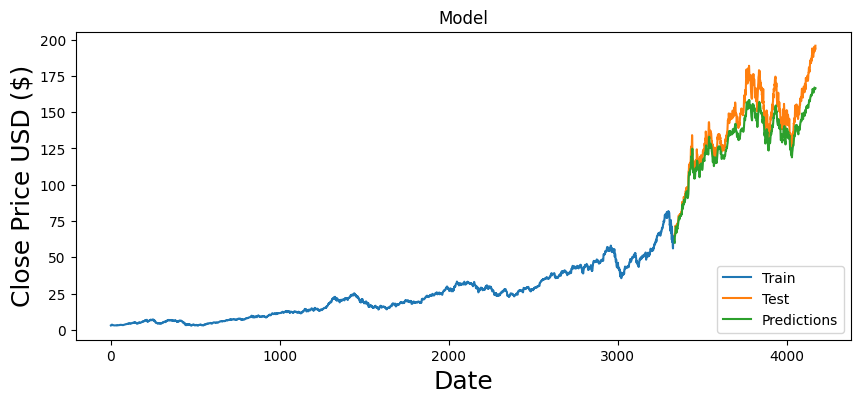

<ipython-input-41-6160f444ff13>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions_dict[stock]


MSFT-


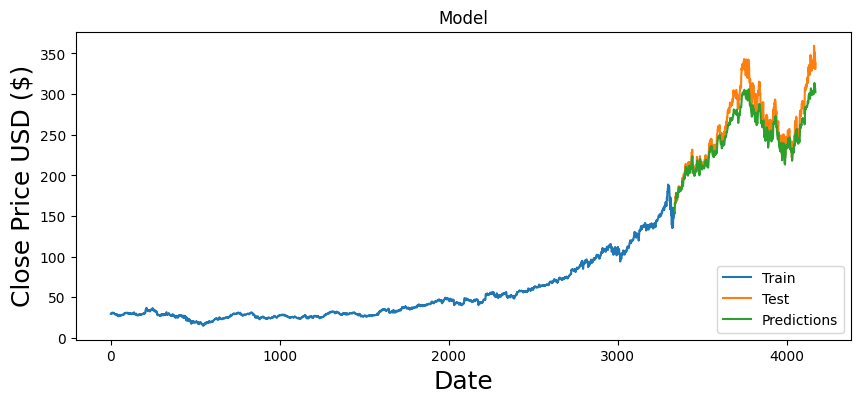

<ipython-input-41-6160f444ff13>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions_dict[stock]


AMZN-


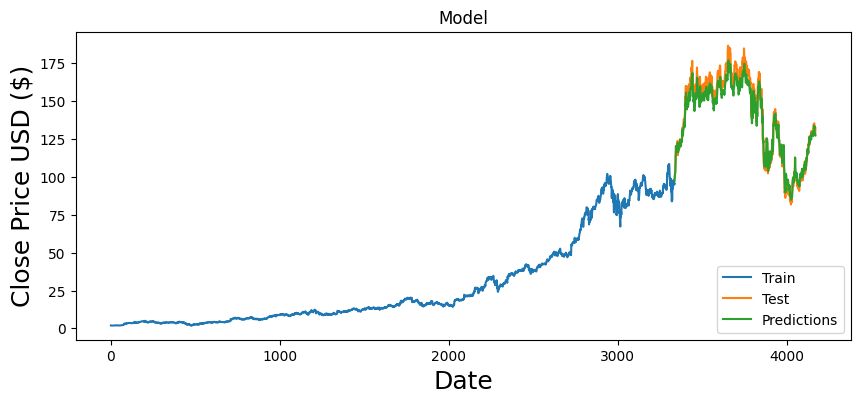

<ipython-input-41-6160f444ff13>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions_dict[stock]


NFLX-


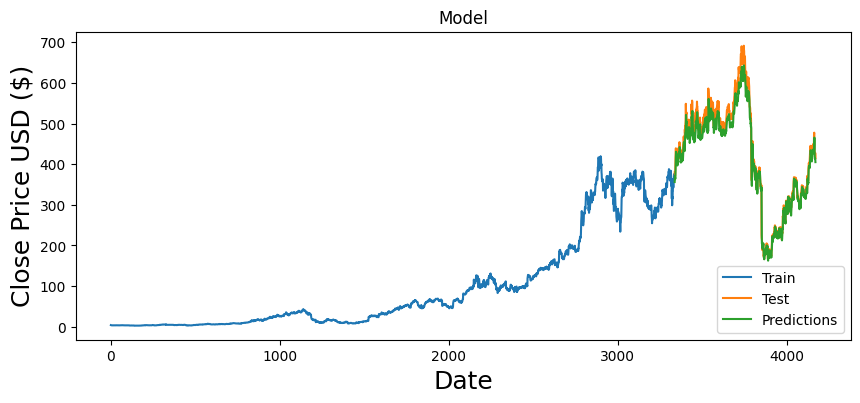

<ipython-input-41-6160f444ff13>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions_dict[stock]


INFY-


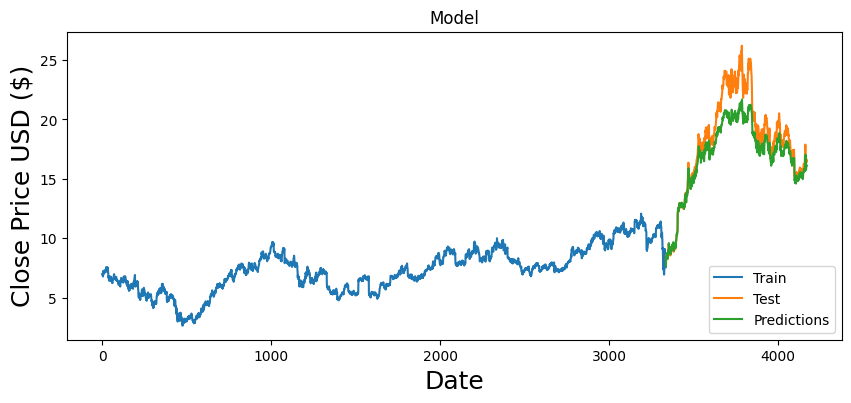

<ipython-input-41-6160f444ff13>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions_dict[stock]


ADBE-


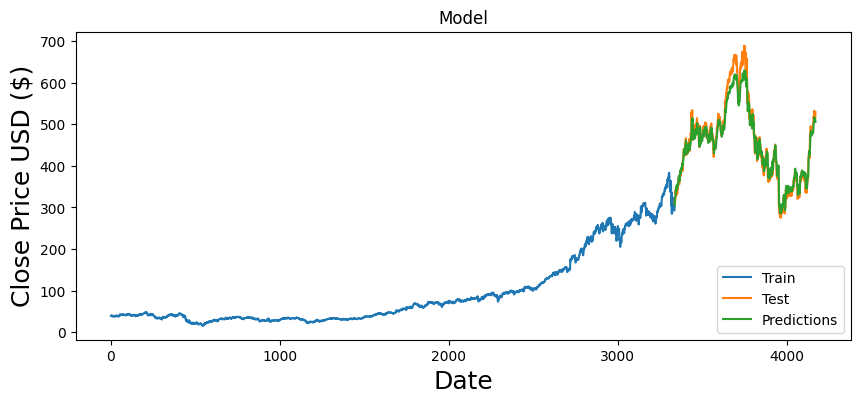

<ipython-input-41-6160f444ff13>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions_dict[stock]


GOOGL-


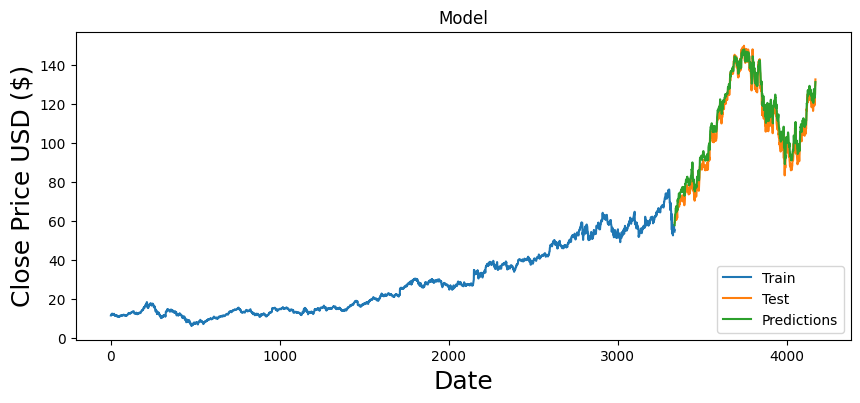

<ipython-input-41-6160f444ff13>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions_dict[stock]


NVDA-


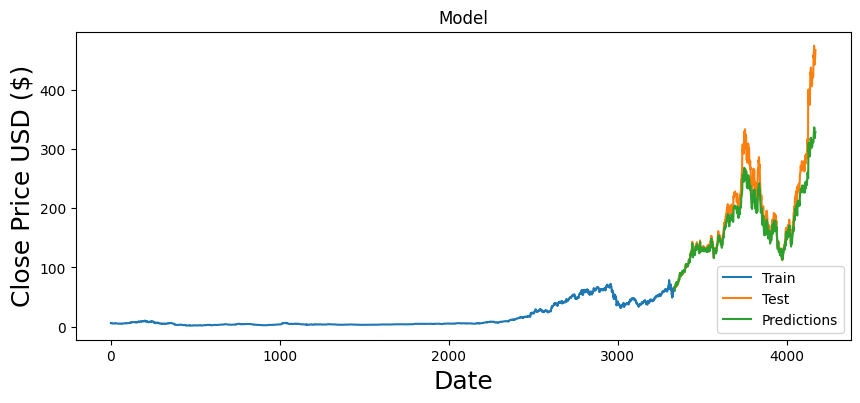

In [ ]:
for stock in predictions_dict:
  #Creating a new dataframe with only the 'Close' column
  data = stock_dict[stock].filter(['Close'])

  #Plot/Create the data for the graph
  train = data[:training_data_len]
  valid = data[training_data_len:]
  valid['Predictions'] = predictions_dict[stock]

  #Visualize the data
  print(stock + "-")
  plt.figure(figsize=(10,4))
  plt.title('Model')
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Close Price USD ($)', fontsize=18)
  plt.plot(train['Close'])
  plt.plot(valid[['Close', 'Predictions']])
  plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
  plt.show()

Case 1b: Predicting without using any previous data

In [ ]:
import datetime

In [ ]:
next_n_days_predictions_dict = {}

for stock in stock_dict:

  # Predict the next n days
  n = 1211

  sequence_length = 60

  last_sequence = test_data_dict[stock][:sequence_length, :]
  next_n_days_predictions = []
  for _ in range(n):
    prediction = model_dict[stock].predict(np.reshape(last_sequence, (1, sequence_length, 1)))
    next_n_days_predictions.append(prediction[0, 0])
    last_sequence = np.concatenate((last_sequence[1:], prediction), axis=0)

  # Scale the predictions back to original range
  next_n_days_predictions = scaler_dict[stock].inverse_transform(np.array(next_n_days_predictions).reshape(-1, 1))

  # Generate dates starting from 01/08/2023
  start_date = datetime.datetime(2020, 4, 4)
  next_n_days_dates = [start_date + datetime.timedelta(days=i) for i in range(n)]

  # Converting to pandas DataFrame
  predictions_dates_df = pd.DataFrame(next_n_days_dates)
  predictions_prices_df = pd.DataFrame(next_n_days_predictions)

  df_predictions = pd.concat([predictions_dates_df, predictions_prices_df], axis=1)
  df_predictions.columns = ['Date', "Price"]



  forecast = df_predictions[df_predictions['Date'].isin(stock_dict["AAPL"].iloc[training_data_len: , :]["Date"])]

  # Start the index from a particular number (e.g., 10)
  start_index = 3337
  new_index = range(start_index, start_index + len(forecast))

  # Set the new index for the DataFrame
  forecast.index = new_index

  # Changing Column names
  forecast.columns = ["Date", "Close"]

  # Putting the DataFrame into dictionary
  next_n_days_predictions_dict[stock] = forecast

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 55ms/step


In [ ]:
rmse_dict_2 = {}
mae_dict_2 = {}
mape_dict_2 = {}

for stock in stock_dict:
  # Calculating RMSE
  rmse=np.sqrt(np.mean(((next_n_days_predictions_dict[stock]["Close"] - stock_dict[stock].iloc[training_data_len: , :]["Close"])**2)))
  rmse = round(rmse, 2)

  # Calculating MAE
  mae = np.mean(np.abs(next_n_days_predictions_dict[stock]["Close"] - stock_dict[stock].iloc[training_data_len: , :]["Close"]))
  mae = round(mae, 2)

  # Calculating MAPE
  mape = np.mean(np.abs((next_n_days_predictions_dict[stock]["Close"] - stock_dict[stock].iloc[training_data_len: , :]["Close"]) / stock_dict[stock].iloc[training_data_len: , :]["Close"])) * 100
  mape = round(mape, 2)

  rmse_dict_2[stock] = rmse
  mae_dict_2[stock] = mae
  mape_dict_2[stock] = mape

In [ ]:
rmse_dict_2

{'AAPL': 121.93,
 'MSFT': 90.68,
 'AMZN': 32.55,
 'NFLX': 463.19,
 'INFY': 6.38,
 'ADBE': 97.33,
 'GOOGL': 40.57,
 'NVDA': 114.83}

In [ ]:
mae_dict_2

{'AAPL': 116.92,
 'MSFT': 79.92,
 'AMZN': 28.27,
 'NFLX': 439.2,
 'INFY': 5.53,
 'ADBE': 76.86,
 'GOOGL': 34.3,
 'NVDA': 84.41}

In [ ]:
mape_dict_2

{'AAPL': 80.74,
 'MSFT': 28.75,
 'AMZN': 19.58,
 'NFLX': 104.9,
 'INFY': 28.53,
 'ADBE': 16.9,
 'GOOGL': 38.0,
 'NVDA': 36.34}

In [ ]:
next_n_days_predictions_dict["AAPL"]["Close"]

3337    59.474781
3338    59.191437
3339    58.908237
3340    58.624161
3341    57.498940
          ...    
4166    19.761242
4167    19.761242
4168    19.761242
4169    19.761242
4170    19.761244
Name: Close, Length: 834, dtype: float32

In [ ]:
stock_dict["AAPL"].iloc[training_data_len:, :]

,Date,Open,High,Low,Close,Adj Close,Volume
3337,2020-04-06,62.724998,65.777496,62.345001,65.617500,64.162804,201820400
3338,2020-04-07,67.699997,67.925003,64.750000,64.857498,63.419651,202887200
3339,2020-04-08,65.684998,66.842499,65.307503,66.517502,65.042854,168895200
3340,2020-04-09,67.175003,67.517502,66.175003,66.997498,65.512215,161834800
3341,2020-04-13,67.077499,68.425003,66.457497,68.312500,66.798058,131022800
...,...,...,...,...,...,...,...
4166,2023-07-24,193.410004,194.910004,192.250000,192.750000,192.490067,45377800
4167,2023-07-25,193.330002,194.440002,192.919998,193.619995,193.358887,37283200
4168,2023-07-26,193.669998,195.639999,193.320007,194.500000,194.237701,47471900
4169,2023-07-27,196.020004,197.199997,192.550003,193.220001,192.959427,47460200


AAPL-


<ipython-input-50-6bd449eddbf4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = next_n_days_predictions_dict[stock]["Close"]


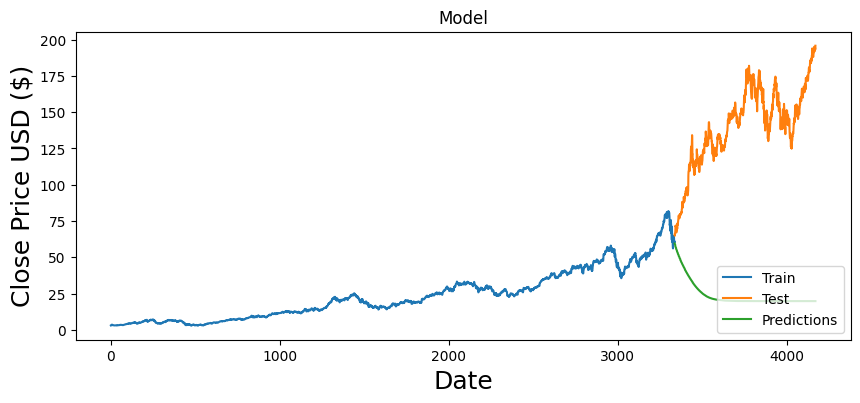

<ipython-input-50-6bd449eddbf4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = next_n_days_predictions_dict[stock]["Close"]


MSFT-


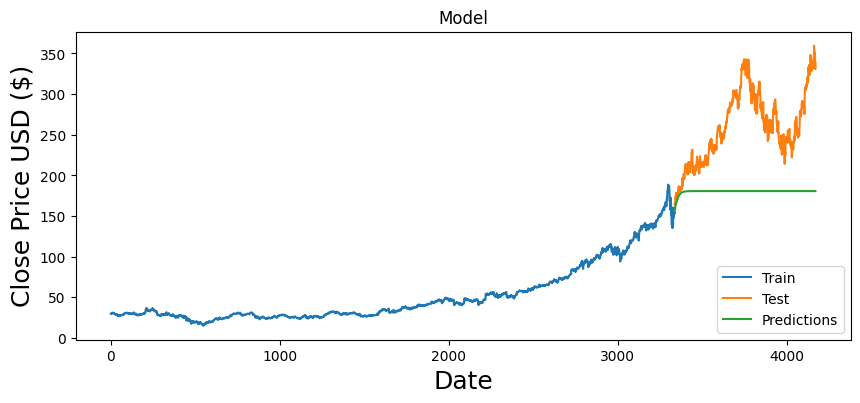

<ipython-input-50-6bd449eddbf4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = next_n_days_predictions_dict[stock]["Close"]


AMZN-


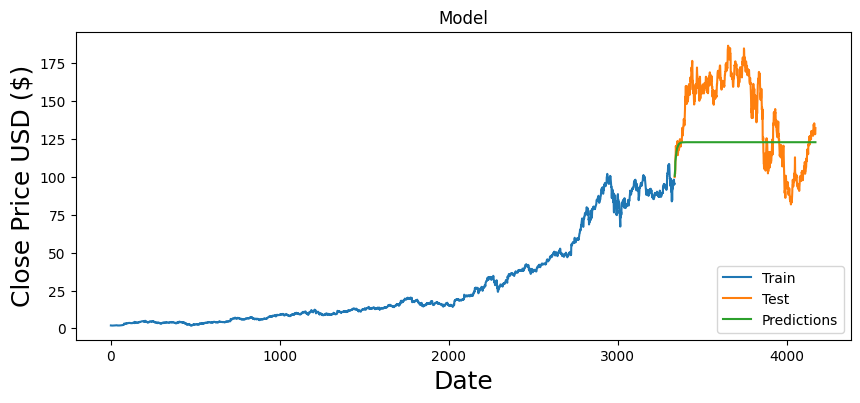

<ipython-input-50-6bd449eddbf4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = next_n_days_predictions_dict[stock]["Close"]


NFLX-


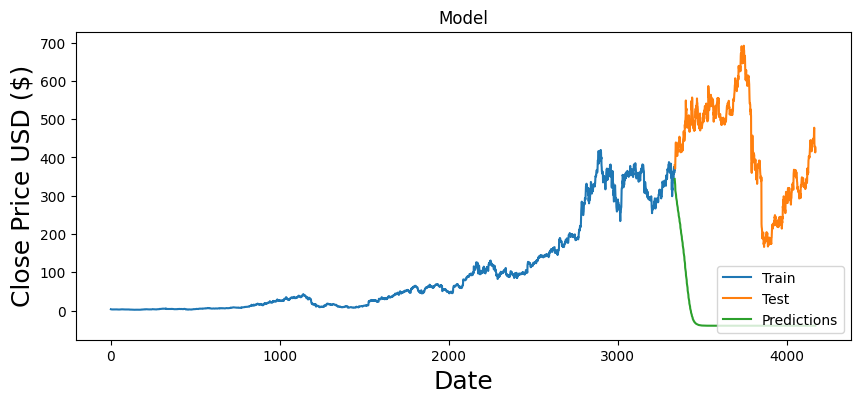

<ipython-input-50-6bd449eddbf4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = next_n_days_predictions_dict[stock]["Close"]


INFY-


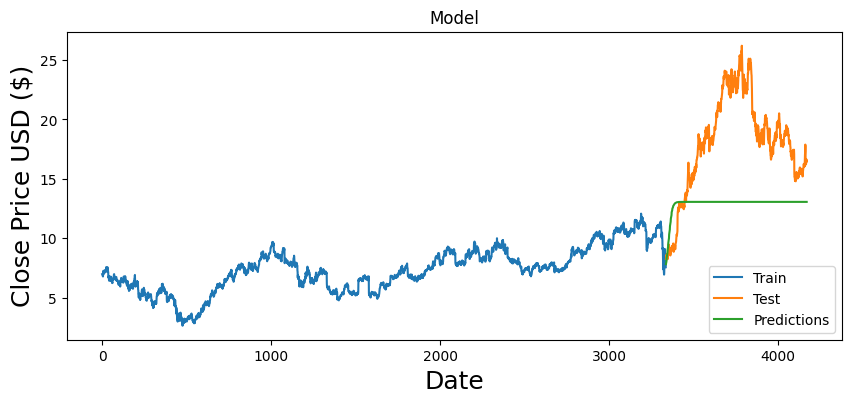

<ipython-input-50-6bd449eddbf4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = next_n_days_predictions_dict[stock]["Close"]


ADBE-


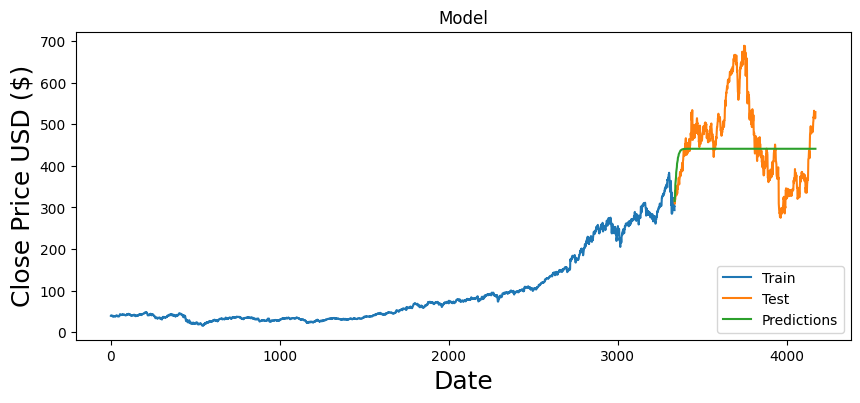

<ipython-input-50-6bd449eddbf4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = next_n_days_predictions_dict[stock]["Close"]


GOOGL-


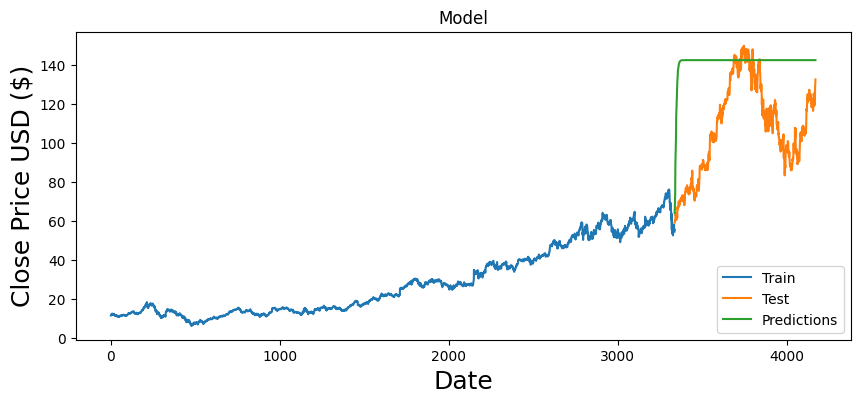

<ipython-input-50-6bd449eddbf4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = next_n_days_predictions_dict[stock]["Close"]


NVDA-


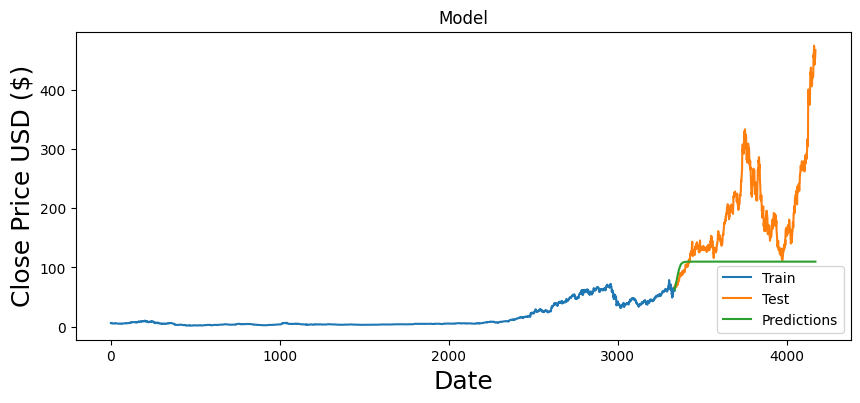

In [ ]:
for stock in next_n_days_predictions_dict:
  #Creating a new dataframe with only the 'Close' column
  data = stock_dict[stock].filter(['Close'])

  #Plot/Create the data for the graph
  train = data[:training_data_len]
  valid = data[training_data_len:]
  valid['Predictions'] = next_n_days_predictions_dict[stock]["Close"]

  #Visualize the data
  print(stock + "-")
  plt.figure(figsize=(10,4))
  plt.title('Model')
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Close Price USD ($)', fontsize=18)
  plt.plot(train['Close'])
  plt.plot(valid[['Close', 'Predictions']])
  plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
  plt.show()

## Small Dataset

In [ ]:
from datetime import datetime

In [ ]:
start = "2023-01-01"
end = "2023-07-31"

# Convert start and end dates to datetime objects
start_date = datetime.strptime(start, "%Y-%m-%d")
end_date = datetime.strptime(end, "%Y-%m-%d")

# Set up the data reader with Yahoo Finance
yf.pdr_override()

In [ ]:
# Making dictionary for every stock
stock_dict_small = {}
for stock in stock_types:
  stock_dict_small[stock] = None

In [ ]:
for stock in stock_dict_small:
  # Fetch the data using DataReader
  df = pdr.get_data_yahoo(stock, start=start_date, end=end_date)
  df = df.reset_index()

  if df is not None:
    stock_dict_small[stock] = df
    print(stock + "-" )
    print(df.head())  # Display the first few rows of the loaded data

[*********************100%%**********************]  1 of 1 completed
AAPL-
        Date        Open        High         Low       Close   Adj Close  \
0 2023-01-03  130.279999  130.899994  124.169998  125.070000  124.538658   
1 2023-01-04  126.889999  128.660004  125.080002  126.360001  125.823189   
2 2023-01-05  127.129997  127.769997  124.760002  125.019997  124.488876   
3 2023-01-06  126.010002  130.289993  124.889999  129.619995  129.069336   
4 2023-01-09  130.470001  133.410004  129.889999  130.149994  129.597076   

      Volume  
0  112117500  
1   89113600  
2   80962700  
3   87754700  
4   70790800  
[*********************100%%**********************]  1 of 1 completed
MSFT-
        Date        Open        High         Low       Close   Adj Close  \
0 2023-01-03  243.080002  245.750000  237.399994  239.580002  237.956329   
1 2023-01-04  232.279999  232.869995  225.960007  229.100006  227.547348   
2 2023-01-05  227.199997  227.550003  221.759995  222.309998  220.803360   

In [ ]:
for stock in stock_dict_small:
  print(stock + "-")
  print(stock_dict_small[stock].info())
  print(stock_dict_small[stock].describe())

AAPL-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       143 non-null    datetime64[ns]
 1   Open       143 non-null    float64       
 2   High       143 non-null    float64       
 3   Low        143 non-null    float64       
 4   Close      143 non-null    float64       
 5   Adj Close  143 non-null    float64       
 6   Volume     143 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 7.9 KB
None
             Open        High         Low       Close   Adj Close  \
count  143.000000  143.000000  143.000000  143.000000  143.000000   
mean   164.616504  166.341399  163.453497  165.059231  164.663172   
std     18.615219   18.412319   18.713290   18.486263   18.591757   
min    126.010002  127.769997  124.169998  125.019997  124.488876   
25%    150.794998  153.195000  150.010002  151.3

In [ ]:
dataset_small = {}

for stock in stock_dict_small:

  #Creating a new dataframe with only the 'Close' column
  data = stock_dict_small[stock].filter(['Close'])

  #Converting the dataframe to a numpy array
  dataset_small[stock] = data.values
  dataset_small[stock] = dataset_small[stock].reshape(-1, 1)

In [ ]:
#Get /Compute the number of rows to train the model on
training_data_len_small = math.ceil( len(dataset_small[stock]) *.8)
training_data_len_small

115

In [ ]:
# Function to load a Keras model
def load_keras_model(model_path):
    return tf.keras.models.load_model(model_path)

# Load all the Keras models
model_dict_small = {}

for stock in stock_dict_small:
    model_filename = f'keras_model_small_{stock}.h5'
    model_path = rf'{model_filename}'
    model = load_keras_model(model_path)

    model_dict_small[stock] = model

In [ ]:
scaler_dict_small = {}
scaled_data_dict_small = {}

for stock in stock_dict_small:
  # Scalling Data for better results and making it suiatble for LSTM model
  scaler_dict_small[stock] = MinMaxScaler(feature_range=(0, 1))
  # here we are Scaling the all of the data to be values between 0 and 1
  scaled_data_dict_small[stock] = scaler_dict_small[stock].fit_transform(dataset_small[stock])

In [ ]:
x_test_dict_small = {}
y_test_dict_small = {}

for stock in scaled_data_dict_small:
  # here we are testing data set
  test_data = scaled_data_dict_small[stock][training_data_len_small - 20: , : ]

  #Creating the x_test and y_test data sets
  x_test = []
  y_test =  dataset_small[stock][training_data_len_small : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
  for i in range(20,len(test_data)):
    x_test.append(test_data[i-20:i,0])

  # here we are converting x_test to a numpy array
  x_test = np.array(x_test)

  # here we are reshaping the data into the shape accepted by the LSTM
  x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

  x_test_dict_small[stock] = x_test
  y_test_dict_small[stock] = y_test

In [ ]:
predictions_dict_small = {}

for stock in x_test_dict_small:
  # now we are getting the models predicted price values
  predictions = model_dict_small[stock].predict(x_test_dict_small[stock])
  predictions = scaler_dict_small[stock].inverse_transform(predictions)#Undo scaling

  predictions_dict_small[stock] = predictions

1/1 [==============================] - 1s 783ms/step


1/1 [==============================] - 1s 780ms/step


1/1 [==============================] - 1s 901ms/step


In [ ]:
rmse_dict_small = {}

for stock in predictions_dict_small:
  # here we are calculaing the value of RMSE
  rmse=np.sqrt(np.mean(((predictions_dict_small[stock] - y_test_dict_small[stock])**2)))

  rmse_dict_small[stock] = rmse

In [ ]:
mae_dict_small = {}
mape_dict_small = {}

for stock in predictions_dict_small:

    # Calculate MAE
    mae = np.mean(np.abs(predictions_dict_small[stock] - y_test_dict_small[stock]))
    mae_dict_small[stock] = mae

    # Calculate MAPE
    mape = np.mean(np.abs((predictions_dict_small[stock] - y_test_dict_small[stock]) / y_test_dict_small[stock])) * 100
    mape_dict_small[stock] = mape

Calculate Accuracy on various metrics

In [ ]:
rmse_dict_small

{'AAPL': 4.221527546776561,
 'MSFT': 5.9222390414498385,
 'AMZN': 2.064515076423996,
 'NFLX': 19.447618335125696,
 'INFY': 0.3705756426620421,
 'ADBE': 15.061147752370154,
 'GOOGL': 3.435906717513412,
 'NVDA': 10.264015319974988}

In [ ]:
mae_dict_small

{'AAPL': 3.822803497314453,
 'MSFT': 4.609499250139509,
 'AMZN': 1.607726778302874,
 'NFLX': 16.794930594308035,
 'INFY': 0.2401794365474156,
 'ADBE': 12.45865958077567,
 'GOOGL': 3.039921079363142,
 'NVDA': 8.904337201799665}

In [ ]:
mape_dict_small

{'AAPL': 2.0023011840571376,
 'MSFT': 1.3437226434373035,
 'AMZN': 1.2360638318170132,
 'NFLX': 3.80416058320145,
 'INFY': 1.4682578027616975,
 'ADBE': 2.480484946800111,
 'GOOGL': 2.5052232863271513,
 'NVDA': 2.048345065752857}

AAPL-


<ipython-input-67-86cfc769c15a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions_dict_small[stock]


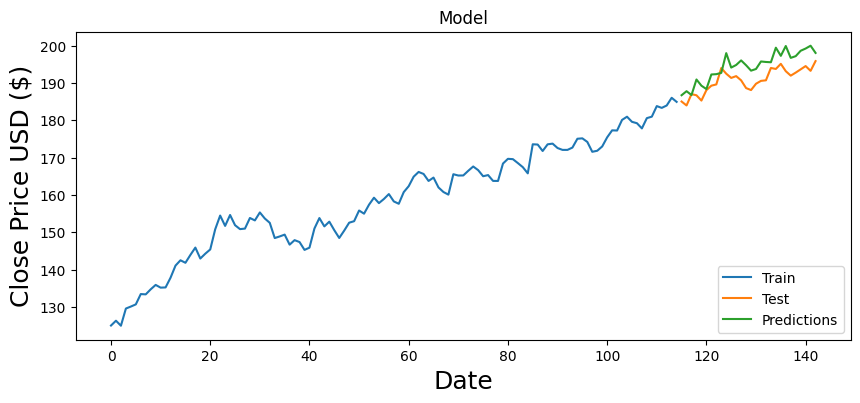

<ipython-input-67-86cfc769c15a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions_dict_small[stock]


MSFT-


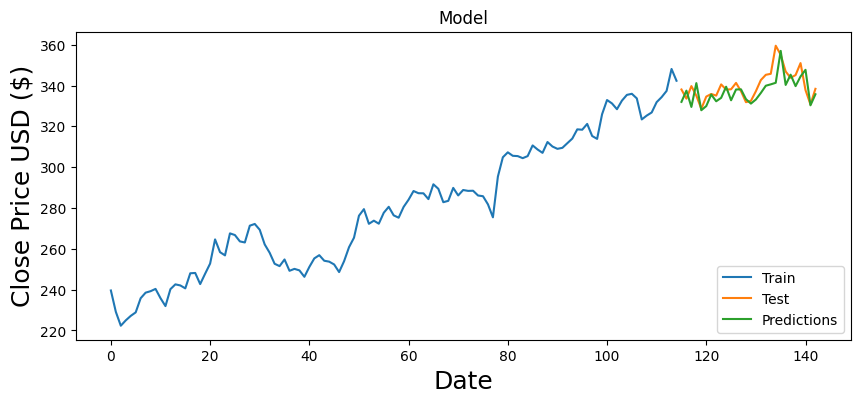

<ipython-input-67-86cfc769c15a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions_dict_small[stock]


AMZN-


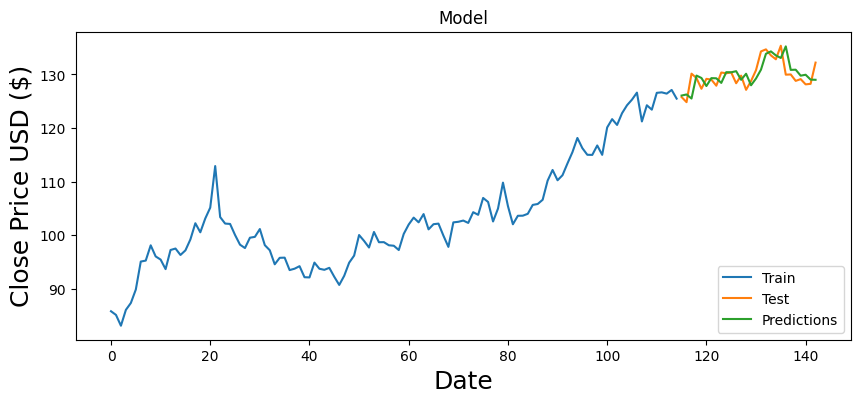

<ipython-input-67-86cfc769c15a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions_dict_small[stock]


NFLX-


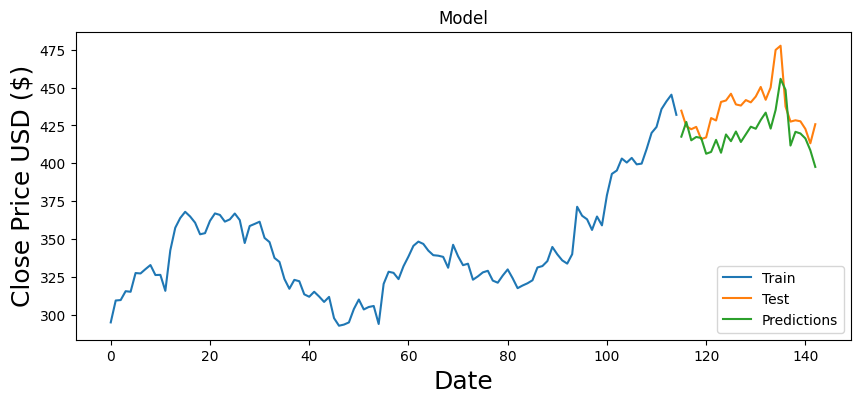

<ipython-input-67-86cfc769c15a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions_dict_small[stock]


INFY-


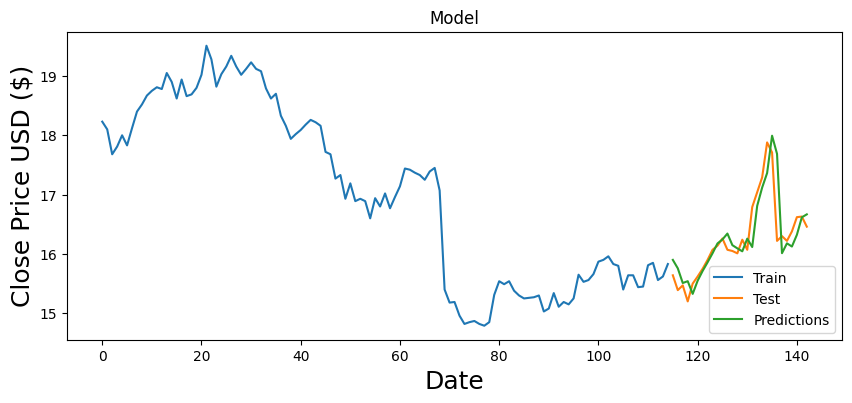

<ipython-input-67-86cfc769c15a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions_dict_small[stock]


ADBE-


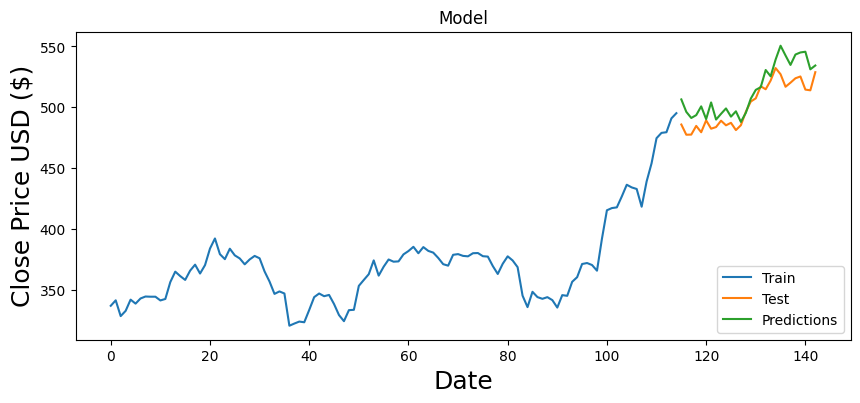

<ipython-input-67-86cfc769c15a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions_dict_small[stock]


GOOGL-


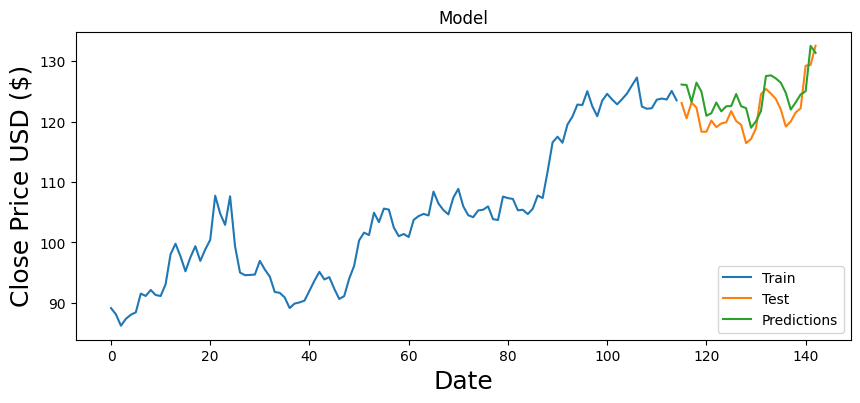

<ipython-input-67-86cfc769c15a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions_dict_small[stock]


NVDA-


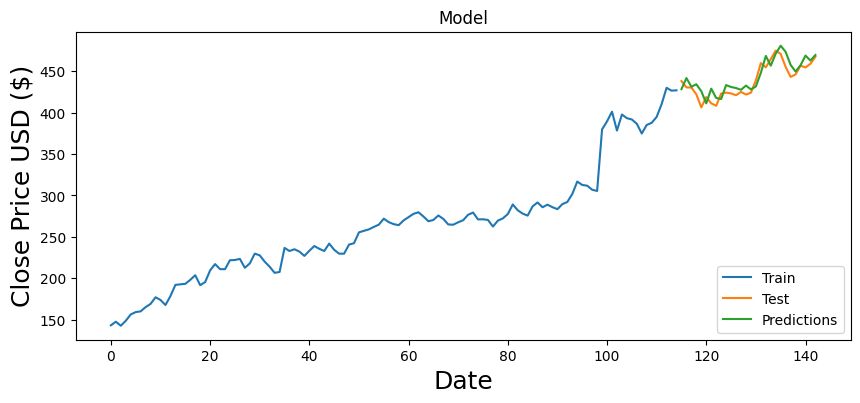

In [ ]:
for stock in predictions_dict_small:
  #Creating a new dataframe with only the 'Close' column
  data = stock_dict_small[stock].filter(['Close'])

  #Plot/Create the data for the graph
  train = data[:training_data_len_small]
  valid = data[training_data_len_small:]
  valid['Predictions'] = predictions_dict_small[stock]

  #Visualize the data
  print(stock + "-")
  plt.figure(figsize=(10,4))
  plt.title('Model')
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Close Price USD ($)', fontsize=18)
  plt.plot(train['Close'])
  plt.plot(valid[['Close', 'Predictions']])
  plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
  plt.show()

Case 2b

In [ ]:
stock_dict_small["AAPL"].iloc[:training_data_len_small, :]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,130.279999,130.899994,124.169998,125.070000,124.538658,112117500
1,2023-01-04,126.889999,128.660004,125.080002,126.360001,125.823189,89113600
2,2023-01-05,127.129997,127.769997,124.760002,125.019997,124.488876,80962700
3,2023-01-06,126.010002,130.289993,124.889999,129.619995,129.069336,87754700
4,2023-01-09,130.470001,133.410004,129.889999,130.149994,129.597076,70790800
...,...,...,...,...,...,...,...
110,2023-06-12,181.270004,183.889999,180.970001,183.789993,183.542145,54274900
111,2023-06-13,182.800003,184.149994,182.440002,183.309998,183.062790,54929100
112,2023-06-14,183.369995,184.389999,182.020004,183.949997,183.701935,57462900
113,2023-06-15,183.960007,186.520004,183.779999,186.009995,185.759155,65433200


In [ ]:
import datetime

In [ ]:
test_data_dict_small = {}

for stock in stock_dict_small:
  # here we are testing data set
  test_data_dict_small[stock] = scaled_data_dict_small[stock][training_data_len_small - 20: , : ]

In [ ]:
test_data_dict_small["AAPL"].shape

(48, 1)

In [ ]:
scaled_data_dict_small["AAPL"].shape

(143, 1)

In [ ]:
training_data_len_small

115

In [ ]:
next_n_days_predictions_dict_small = {}

for stock in stock_dict_small:

  # Predict the next n days
  n = 42

  sequence_length = 20
  last_sequence = test_data_dict_small[stock][:sequence_length, :]
  next_n_days_predictions_small = []
  for _ in range(n):
    prediction = model_dict_small[stock].predict(np.reshape(last_sequence, (1, sequence_length, 1)))
    next_n_days_predictions_small.append(prediction[0, 0])
    last_sequence = np.concatenate((last_sequence[1:], prediction), axis=0)

  # Scale the predictions back to original range
  next_n_days_predictions_small = scaler_dict_small[stock].inverse_transform(np.array(next_n_days_predictions_small).reshape(-1, 1))

  # Generate dates starting from 01/08/2023
  start_date = datetime.datetime(2023, 6, 17)
  next_n_days_dates = [start_date + datetime.timedelta(days=i) for i in range(n)]

  # Converting to pandas DataFrame
  predictions_dates_df = pd.DataFrame(next_n_days_dates)
  predictions_prices_df = pd.DataFrame(next_n_days_predictions_small)

  df_predictions = pd.concat([predictions_dates_df, predictions_prices_df], axis=1)
  df_predictions.columns = ['Date', "Price"]


  forecast = df_predictions[df_predictions['Date'].isin(stock_dict_small[stock].iloc[training_data_len_small: , :]["Date"])]

  # Start the index from a particular number (e.g., 10)
  start_index = 115
  new_index = range(start_index, start_index + len(forecast))

  # Set the new index for the DataFrame
  forecast.index = new_index

  # Changing Column names
  forecast.columns = ["Date", "Close"]

  # Putting the DataFrame into dictionary
  next_n_days_predictions_dict_small[stock] = forecast

1/1 [==============================] - 0s 22ms/step


In [ ]:
rmse_dict_small_2 = {}
mae_dict_small_2 = {}
mape_dict_small_2 = {}

for stock in stock_dict_small:
  # Calculating RMSE
  rmse=np.sqrt(np.mean(((next_n_days_predictions_dict_small[stock]["Close"] - stock_dict_small[stock].iloc[training_data_len_small: , :]["Close"])**2)))
  rmse = round(rmse, 2)

  # Calculating MAE
  mae = np.mean(np.abs(next_n_days_predictions_dict_small[stock]["Close"] - stock_dict_small[stock].iloc[training_data_len_small: , :]["Close"]))
  mae = round(mae, 2)

  # Calculating MAPE
  mape = np.mean(np.abs((next_n_days_predictions_dict_small[stock]["Close"] - stock_dict_small[stock].iloc[training_data_len_small: , :]["Close"]) / stock_dict_small[stock].iloc[training_data_len_small: , :]["Close"])) * 100
  mape = round(mape, 2)

  rmse_dict_small_2[stock] = rmse
  mae_dict_small_2[stock] = mae
  mape_dict_small_2[stock] = mape

In [ ]:
rmse_dict_small_2

{'AAPL': 178.27,
 'MSFT': 19.37,
 'AMZN': 3.72,
 'NFLX': 104.32,
 'INFY': 0.65,
 'ADBE': 996.38,
 'GOOGL': 48.29,
 'NVDA': 206.05}

In [ ]:
mae_dict_small_2

{'AAPL': 142.05,
 'MSFT': 16.85,
 'AMZN': 2.85,
 'NFLX': 96.11,
 'INFY': 0.6,
 'ADBE': 909.04,
 'GOOGL': 46.04,
 'NVDA': 169.96}

In [ ]:
mape_dict_small_2

{'AAPL': 73.79,
 'MSFT': 4.91,
 'AMZN': 2.2,
 'NFLX': 21.88,
 'INFY': 3.69,
 'ADBE': 179.2,
 'GOOGL': 37.79,
 'NVDA': 38.01}

AAPL-


<ipython-input-111-1be8b47f3fb8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = next_n_days_predictions_dict_small[stock]["Close"]


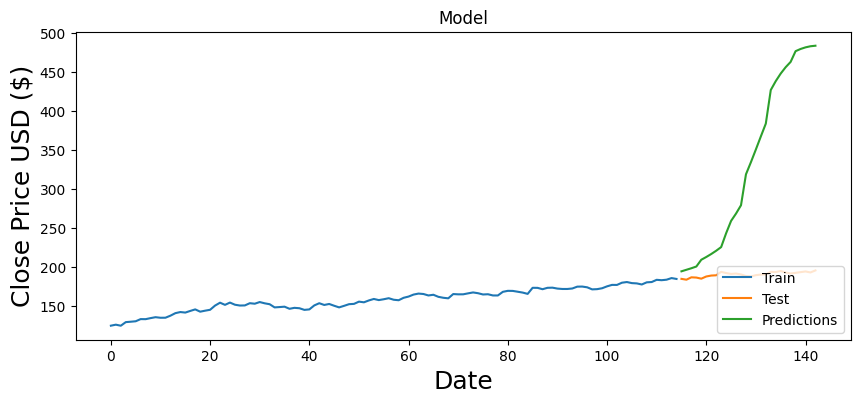

<ipython-input-111-1be8b47f3fb8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = next_n_days_predictions_dict_small[stock]["Close"]


MSFT-


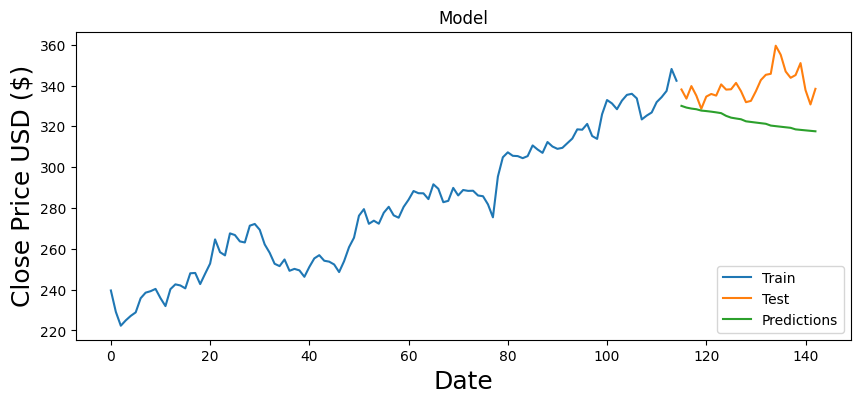

<ipython-input-111-1be8b47f3fb8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = next_n_days_predictions_dict_small[stock]["Close"]


AMZN-


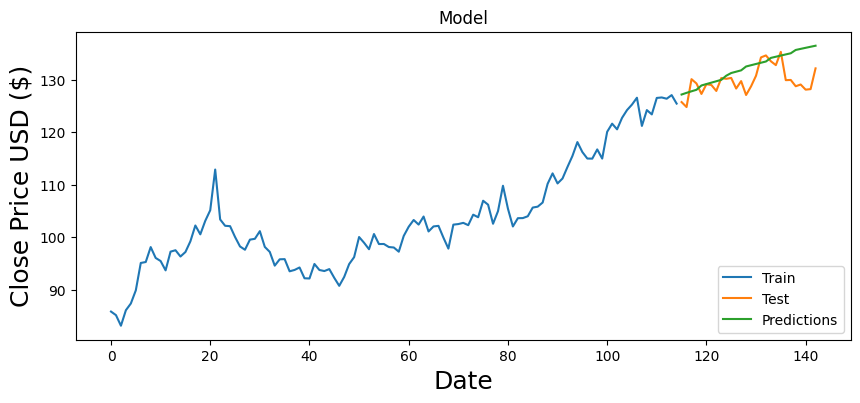

<ipython-input-111-1be8b47f3fb8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = next_n_days_predictions_dict_small[stock]["Close"]


NFLX-


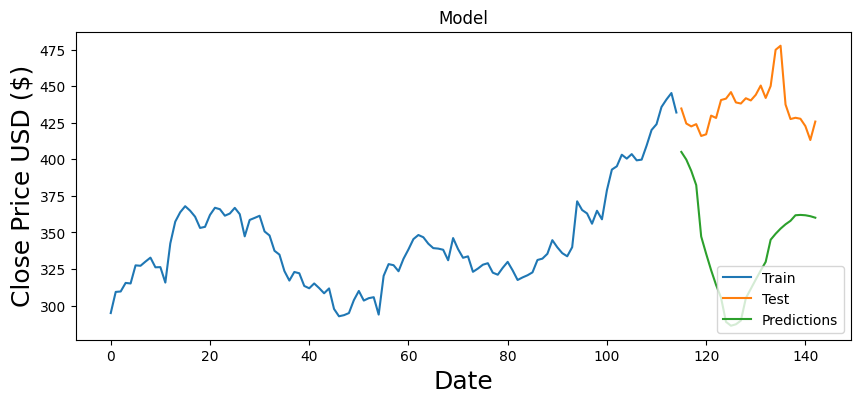

<ipython-input-111-1be8b47f3fb8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = next_n_days_predictions_dict_small[stock]["Close"]


INFY-


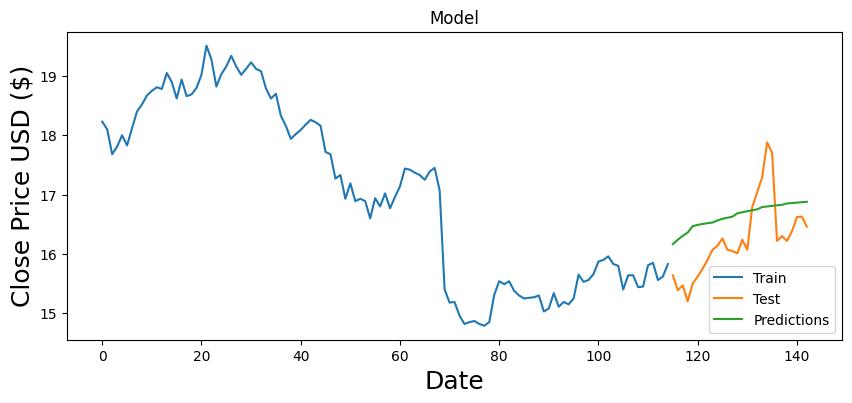

<ipython-input-111-1be8b47f3fb8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = next_n_days_predictions_dict_small[stock]["Close"]


ADBE-


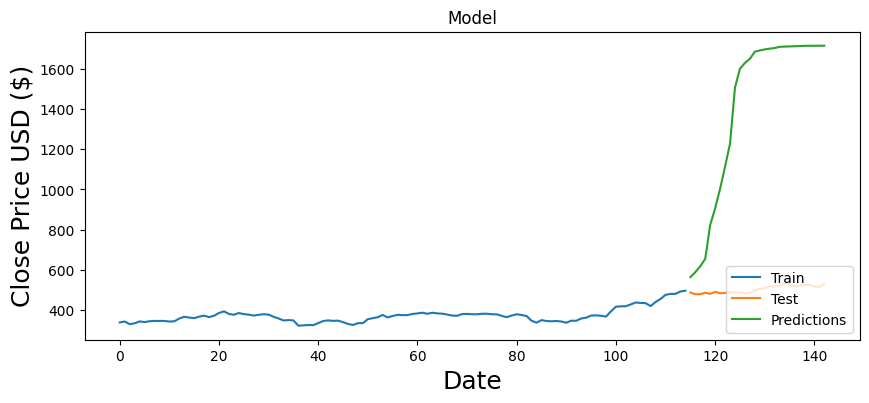

<ipython-input-111-1be8b47f3fb8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = next_n_days_predictions_dict_small[stock]["Close"]


GOOGL-


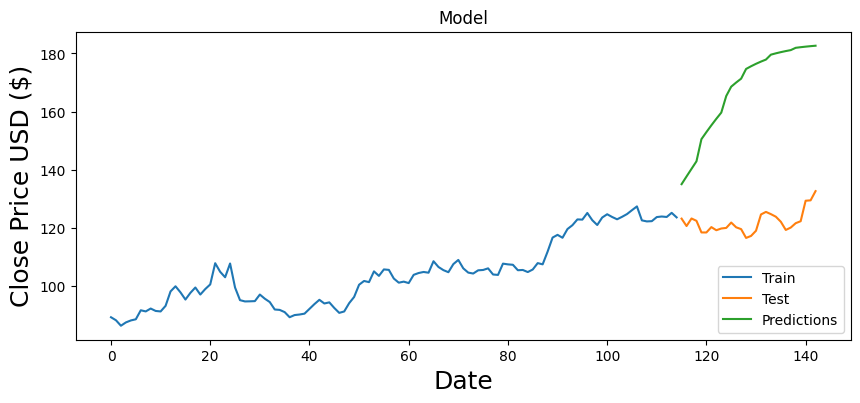

<ipython-input-111-1be8b47f3fb8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = next_n_days_predictions_dict_small[stock]["Close"]


NVDA-


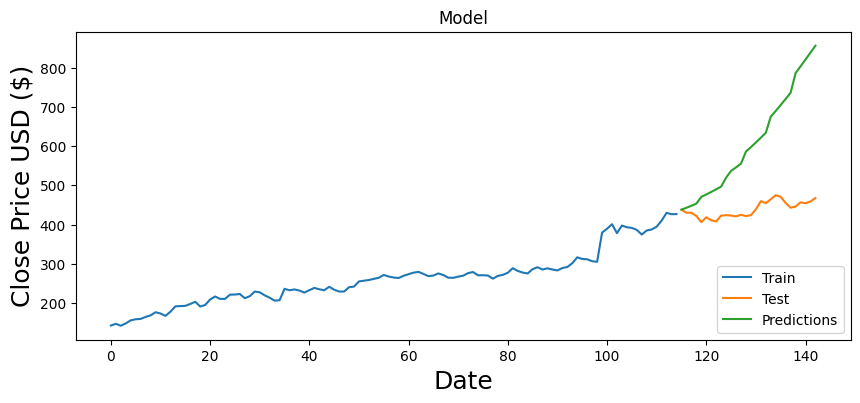

In [ ]:
for stock in next_n_days_predictions_dict:
  #Creating a new dataframe with only the 'Close' column
  data = stock_dict_small[stock].filter(['Close'])

  #Plot/Create the data for the graph
  train = data[:training_data_len_small]
  valid = data[training_data_len_small:]
  valid['Predictions'] = next_n_days_predictions_dict_small[stock]["Close"]

  #Visualize the data
  print(stock + "-")
  plt.figure(figsize=(10,4))
  plt.title('Model')
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Close Price USD ($)', fontsize=18)
  plt.plot(train['Close'])
  plt.plot(valid[['Close', 'Predictions']])
  plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
  plt.show()

In [ ]:
for stock in stock_dict:
  # Save the DataFrame as a CSV file
  csv_file_path = f'true_{stock}.csv'
  stock_dict[stock].iloc[training_data_len:, :].to_csv(csv_file_path, index=False)  # Set index=False to exclude the index column in the CSV

  print("DataFrame saved as CSV:", csv_file_path)

DataFrame saved as CSV: true_AAPL.csv
DataFrame saved as CSV: true_MSFT.csv
DataFrame saved as CSV: true_AMZN.csv
DataFrame saved as CSV: true_NFLX.csv
DataFrame saved as CSV: true_INFY.csv
DataFrame saved as CSV: true_ADBE.csv
DataFrame saved as CSV: true_GOOGL.csv
DataFrame saved as CSV: true_NVDA.csv


In [ ]:
for stock in stock_dict:
  # Save the DataFrame as a CSV file
  csv_file_path = f'predictions_{stock}.csv'
  next_n_days_predictions_dict[stock].to_csv(csv_file_path, index=False)  # Set index=False to exclude the index column in the CSV

  print("DataFrame saved as CSV:", csv_file_path)

DataFrame saved as CSV: predictions_AAPL.csv
DataFrame saved as CSV: predictions_MSFT.csv
DataFrame saved as CSV: predictions_AMZN.csv
DataFrame saved as CSV: predictions_NFLX.csv
DataFrame saved as CSV: predictions_INFY.csv
DataFrame saved as CSV: predictions_ADBE.csv
DataFrame saved as CSV: predictions_GOOGL.csv
DataFrame saved as CSV: predictions_NVDA.csv


In [ ]:
for stock in stock_dict_small:
  # Save the DataFrame as a CSV file
  csv_file_path = f'predictions_small_{stock}.csv'
  next_n_days_predictions_dict_small[stock].to_csv(csv_file_path, index=False)  # Set index=False to exclude the index column in the CSV

  print("DataFrame saved as CSV:", csv_file_path)

DataFrame saved as CSV: predictions_small_AAPL.csv
DataFrame saved as CSV: predictions_small_MSFT.csv
DataFrame saved as CSV: predictions_small_AMZN.csv
DataFrame saved as CSV: predictions_small_NFLX.csv
DataFrame saved as CSV: predictions_small_INFY.csv
DataFrame saved as CSV: predictions_small_ADBE.csv
DataFrame saved as CSV: predictions_small_GOOGL.csv
DataFrame saved as CSV: predictions_small_NVDA.csv


In [ ]:
for stock in stock_dict_small:
  # Save the DataFrame as a CSV file
  csv_file_path = f'true_small_{stock}.csv'
  stock_dict_small[stock].iloc[training_data_len_small:, :].to_csv(csv_file_path, index=False)  # Set index=False to exclude the index column in the CSV

  print("DataFrame saved as CSV:", csv_file_path)

DataFrame saved as CSV: true_small_AAPL.csv
DataFrame saved as CSV: true_small_MSFT.csv
DataFrame saved as CSV: true_small_AMZN.csv
DataFrame saved as CSV: true_small_NFLX.csv
DataFrame saved as CSV: true_small_INFY.csv
DataFrame saved as CSV: true_small_ADBE.csv
DataFrame saved as CSV: true_small_GOOGL.csv
DataFrame saved as CSV: true_small_NVDA.csv


In [ ]:
df_sample = pd.DataFrame()

In [ ]:
for stock in stock_dict:
  # Save the DataFrame as a CSV file
  df_temp = pd.DataFrame(predictions_dict[stock])
  csv_file_path = f'better_predictions_{stock}.csv'
  df_temp.to_csv(csv_file_path, index=False)  # Set index=False to exclude the index column in the CSV

  print("DataFrame saved as CSV:", csv_file_path)

DataFrame saved as CSV: better_predictions_AAPL.csv
DataFrame saved as CSV: better_predictions_MSFT.csv
DataFrame saved as CSV: better_predictions_AMZN.csv
DataFrame saved as CSV: better_predictions_NFLX.csv
DataFrame saved as CSV: better_predictions_INFY.csv
DataFrame saved as CSV: better_predictions_ADBE.csv
DataFrame saved as CSV: better_predictions_GOOGL.csv
DataFrame saved as CSV: better_predictions_NVDA.csv


In [ ]:
for stock in stock_dict_small:
  # Save the DataFrame as a CSV file
  df_temp = pd.DataFrame(predictions_dict_small[stock])
  csv_file_path = f'better_predictions_small_{stock}.csv'
  df_temp.to_csv(csv_file_path, index=False)  # Set index=False to exclude the index column in the CSV

  print("DataFrame saved as CSV:", csv_file_path)

DataFrame saved as CSV: better_predictions_small_AAPL.csv
DataFrame saved as CSV: better_predictions_small_MSFT.csv
DataFrame saved as CSV: better_predictions_small_AMZN.csv
DataFrame saved as CSV: better_predictions_small_NFLX.csv
DataFrame saved as CSV: better_predictions_small_INFY.csv
DataFrame saved as CSV: better_predictions_small_ADBE.csv
DataFrame saved as CSV: better_predictions_small_GOOGL.csv
DataFrame saved as CSV: better_predictions_small_NVDA.csv


In [ ]:
true = stock_dict["INFY"].iloc[training_data_len:, :]

In [ ]:
true_small = stock_dict_small["AMZN"].iloc[training_data_len_small:, :]

In [ ]:
true_small

,Date,Open,High,Low,Close,Adj Close,Volume
115,2023-06-20,124.970001,127.250000,124.500000,125.779999,125.779999,56930100
116,2023-06-21,125.639999,126.730003,123.849998,124.830002,124.830002,52137700
117,2023-06-22,125.309998,130.330002,125.139999,130.149994,130.149994,90354600
118,2023-06-23,129.110001,130.839996,128.279999,129.330002,129.330002,71855200
119,2023-06-26,129.330002,131.490005,127.099998,127.330002,127.330002,59989300
120,2023-06-27,128.630005,130.089996,127.550003,129.179993,129.179993,46801000
121,2023-06-28,128.940002,131.479996,128.440002,129.039993,129.039993,52149500
122,2023-06-29,128.770004,129.259995,127.260002,127.900002,127.900002,40761000
123,2023-06-30,129.470001,131.250000,128.949997,130.360001,130.360001,54310500
124,2023-07-03,130.820007,131.850006,130.070007,130.220001,130.220001,28264800
